In [83]:
from pyspark import SparkContext, SparkConf

In [84]:
sc.stop()

In [85]:
conf = SparkConf().setAppName("AirportsVisual").setMaster("local")
sc = SparkContext(conf=conf)

In [86]:
rdd = sc\
    .textFile("/Users/skybreakjohnson/Downloads/pythonspark/data/airports/airports-semicolon.csv")\
    .map(lambda x: x.split(";"))\
    .cache()

In [87]:
data = rdd\
    .map(lambda x: (x[8], 1))\
    .reduceByKey(lambda x, y: x + y)\
    .map(lambda x: (x[1], x[0]))\
    .sortByKey(ascending = False)\
    .collect()

In [91]:
countries = []
numberOfAirports = []

otherCounter = 0
counter = 0

for row in data:
    counter = counter + 1
    
    if counter < 10:
        countries.append(row[1])
        numberOfAirports.append(row[0])
    else: 
        otherCounter = otherCounter + row[0]

countries.append("Sonstige")
numberOfAirports.append(otherCounter)
    

In [92]:
import matplotlib.pyplot as plt

%matplotlib inline

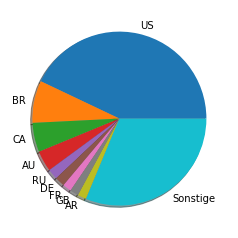

In [93]:
plt.pie(numberOfAirports, labels = countries, shadow = True)
plt.show()